In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [51]:
df_train = pd.read_csv("/home/shifr/jupyter_notebooks/kagle/Binary Classification of Machine Failures/train.csv")
df_test = pd.read_csv("/home/shifr/jupyter_notebooks/kagle/Binary Classification of Machine Failures/test.csv")
df_submission = pd.read_csv("/home/shifr/jupyter_notebooks/kagle/Binary Classification of Machine Failures/sample_submission.csv")

In [52]:

df_submission

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5
...,...,...
90949,227378,0.5
90950,227379,0.5
90951,227380,0.5
90952,227381,0.5


In [53]:
df_train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [54]:
label_encoder = preprocessing.LabelEncoder()
df_train['Type']= label_encoder.fit_transform(df_train['Type'])
df_test['Type']= label_encoder.fit_transform(df_test['Type'])

In [55]:
cat_columns=['Type','TWF', 'HDF', 'PWF', 'OSF','RNF']
numcols=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
target = ['Machine failure']

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  int64  
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  int64  
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 9.0+ MB




### Features

#### id: This is a unique identifier for each data entry in the dataset. It's useful for tracking individual data points but doesn't contribute to the predictive model.

#### Product ID: This identifier for the specific product/machine could be useful in identifying if certain machines are more prone to failure than others.

#### Type: The type of machine or equipment could influence the likelihood of failure. Different types of machines may have different failure rates.

#### Air temperature [K] and Process temperature [K]: The temperatures of the air and the machine during the process could be critical in predicting machine failure. Overheating is a common cause of machine failure.

#### Rotational speed [rpm]: The speed of rotation of the machine could also be a factor in machine failure. Machines running at high speeds may be more likely to fail.

#### Torque [Nm]: The rotational or twisting force applied by the machine could contribute to wear and tear, leading to machine failure.

#### Tool wear [min]: The duration of tool usage could be a strong predictor of machine failure. Tools that have been used for longer periods are more likely to fail.

#### Machine failure: This is our target variable. It's a binary indicator representing whether the machine experienced failure or not.

#### TWF (Tool Wear Failure), HDF (Heat Dissipation Failure), PWF (Power Failure), OSF (Overstrain Failure), RNF (Random Failure): These binary indicators for different types of failures provide detailed information about the nature of the machine failures. They could be useful in building a more nuanced predictive model.


In [58]:
df_train = df_train.drop(["id","Product ID"] ,axis=1)
df_test = df_test.drop(["Product ID"] ,axis=1)

In [59]:
# X = df_train.drop(["id","Machine failure","Product ID"] ,axis=1)
# df_test = df_test.drop(["id","Product ID"] ,axis=1)
# y = df_train["Machine failure"]

In [60]:
def missing_values(df): 
    current=0
    for i in df.columns:
        if pd.isnull(df[i]).any():
            current =1
            print(f"В столбце {i}, есть пропущенные значения.{pd.isnull(df[i]).any()}")
    if not current:
        print("Пропущенных значений нет")

In [61]:
def transformation_cols(df):
    missing_values(df)
    for i in list(df.select_dtypes(include='object').columns):
        df[i] = df[i].fillna('nan')
        df[i] = df[i].astype(str)
    print("\nВ 'object' все пропущенные значения обработаны")
    for i in list(df.select_dtypes(include='int').columns):
        if i not in  'id' and i not in  target:
            df[i] = df[i].fillna(0)
            df[i] = df[i].astype(float)
    print("В 'int' все пропущенные значения обработаны")
    for i in list(df.select_dtypes(include='float').columns):
        if i not in  'id'and i not in  target:
            df[i] = df[i].fillna(0)
            df[i] = df[i].astype(float)
    print("В 'float' все пропущенные значения обработаны")

In [62]:
transformation_cols(df_train)

Пропущенных значений нет

В 'object' все пропущенные значения обработаны
В 'int' все пропущенные значения обработаны
В 'float' все пропущенные значения обработаны


In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     136429 non-null  float64
 1   Air temperature [K]      136429 non-null  float64
 2   Process temperature [K]  136429 non-null  float64
 3   Rotational speed [rpm]   136429 non-null  float64
 4   Torque [Nm]              136429 non-null  float64
 5   Tool wear [min]          136429 non-null  float64
 6   Machine failure          136429 non-null  int64  
 7   TWF                      136429 non-null  float64
 8   HDF                      136429 non-null  float64
 9   PWF                      136429 non-null  float64
 10  OSF                      136429 non-null  float64
 11  RNF                      136429 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 12.5 MB


In [64]:
transformation_cols(df_test)

Пропущенных значений нет

В 'object' все пропущенные значения обработаны
В 'int' все пропущенные значения обработаны
В 'float' все пропущенные значения обработаны


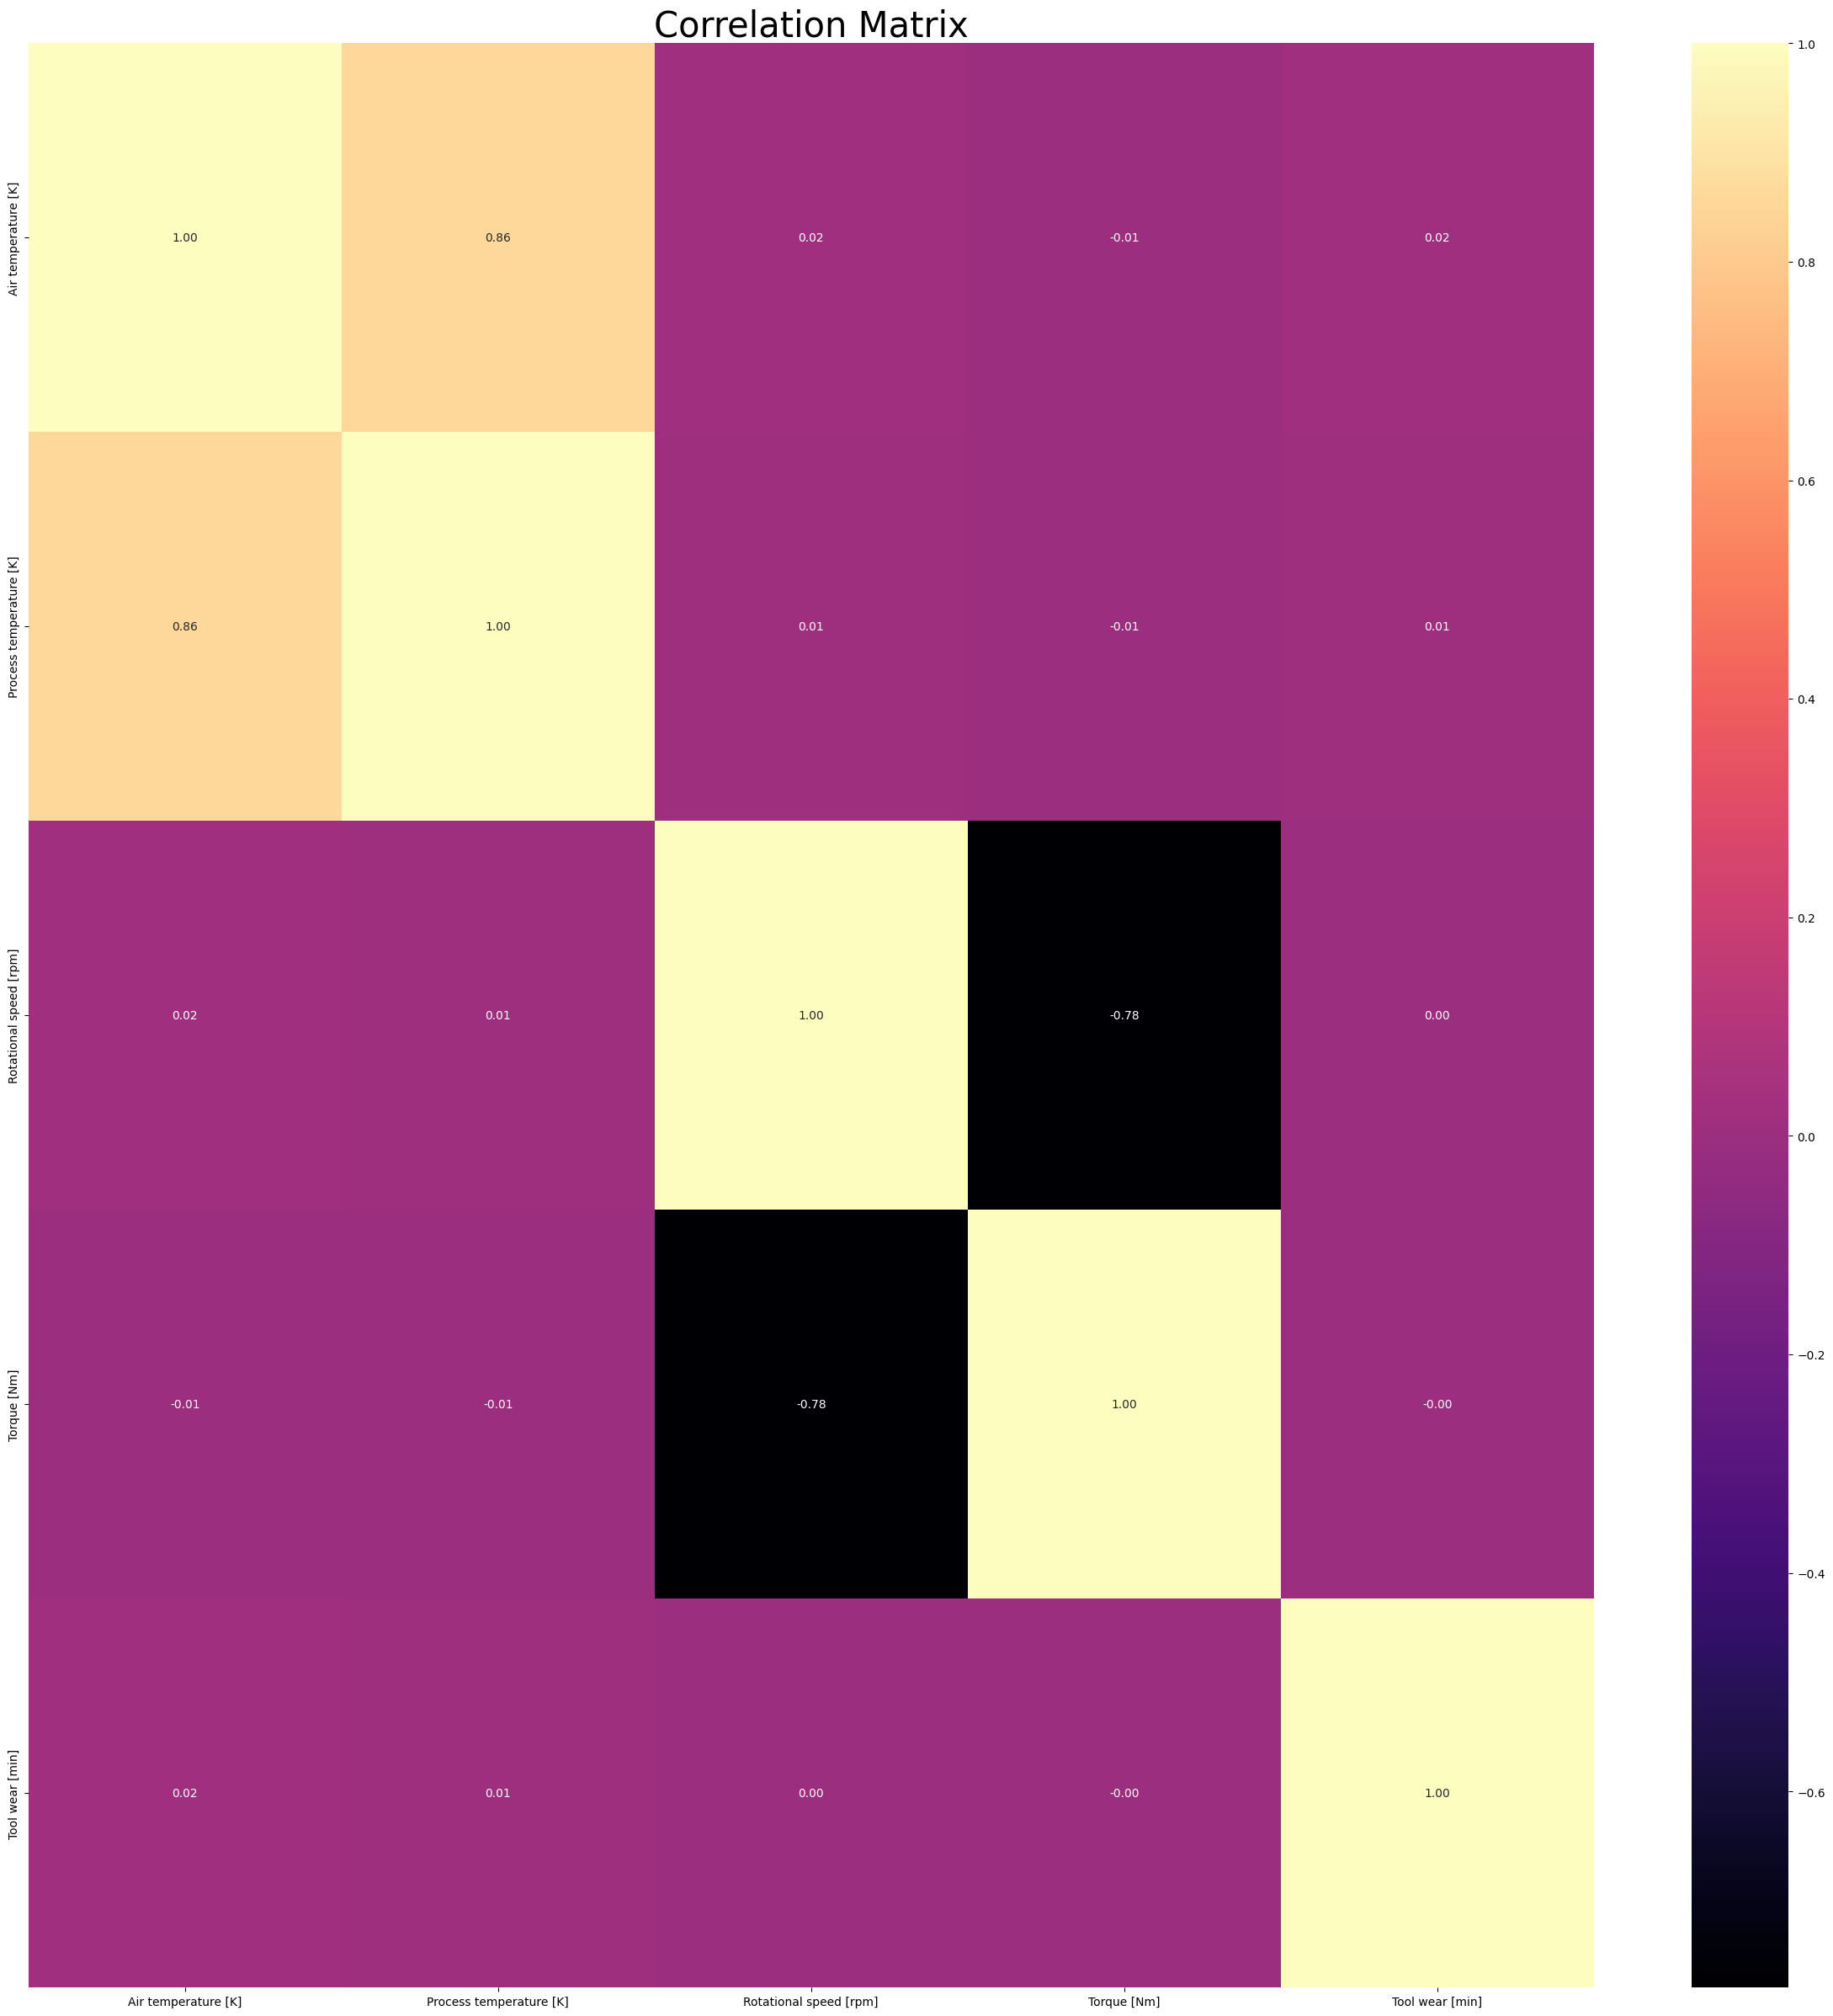

In [65]:
f, ax = plt.subplots(figsize=[30, 30])
sns.heatmap(df_train[numcols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=30)
plt.show()

In [66]:
df_train = df_train.drop(["Air temperature [K]"] ,axis=1)
df_test = df_test.drop(["Air temperature [K]"] ,axis=1)

In [67]:
numcols = numcols[1:]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train[numcols+cat_columns], df_train[target], test_size=0.33, random_state=42)

In [69]:
y_train = pd.Series.ravel(y_train)

In [70]:
clf =RandomForestClassifier(random_state=0)
params = {
    'n_estimators':range(5,51,5),
    'max_depth':range(3,8),
    'min_samples_leaf':range(1,5),
    'min_samples_split':range(5,16)   
}
grid_search_cv_clf = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 35}

In [74]:
y_pred = grid_search_cv_clf.predict(X_test)
accuracy =accuracy_score(y_test,y_pred) 
precision = precision_score(y_test,y_pred) 
f1 = f1_score(y_test,y_pred) 
recall = recall_score(y_test,y_pred) 
print("Accuracy is: ", accuracy)
print("precision is: ", precision)
print("f1 is: ",f1)
print("recall is: ", recall)

Accuracy is:  0.9961352227799742
precision is:  0.9924528301886792
f1 is:  0.8580750407830343
recall is:  0.7557471264367817


In [72]:
y_pred_df_test = grid_search_cv_clf.predict(df_test[numcols+cat_columns])

In [73]:
output = pd.DataFrame({'Id':df_test['id'], 
                          'Machine failure': y_pred_df_test})
output.to_csv('submission_clf.csv', index=False)